In [31]:
import numpy as np
import csv
import scipy.linalg as la
from numpy import dot
from numpy.linalg import norm
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


### Introduction

### Define Constants

In [32]:
CLiqueA_BSize = 18
CliqueA = 7
CliqueB = 11

### Define arrays of the article's results

In [33]:
Init_statusScoresForAllMonks = np.array([0.174,0.188,0.248,0.319,0.420,0.219,0.365,-0.081,-0.142,-0.292,-0.088,-0.123,-0.217,-0.072,-0.03,-0.254,-0.282,-0.287])
Init_statusScoresPosCliqueB = np.array([0.38,0.28,0.464,0.23,0.378,0.368,0.268,0.175,0.194,0.196,0.227])
Init_statusScoresPosNegCliqueB = np.array([0.345,-0.023,0.405,0.196,0.476,0.276,0.351,-0.298,-0.374,-0.127,-0.084])

### Uncomment to print the length of each array
# print(len(Init_statusScoresForAllMonks))
# print(len(Init_statusScoresPosCliqueB))
# print(len(Init_statusScoresPosNegCliqueB))

### Load the data of the liking and disliking from the Sampson Monastery Dataset

In [34]:
with open('sampson_agent_agent[SAMPDLK].csv', newline='') as csvfile:
    dislikingRelations = list(csv.reader(csvfile))
with open('sampson_agent_agent[SAMPLK3].csv', newline='') as csvfile:
    likingRelations = list(csv.reader(csvfile))
    
####Uncomment to print the loaded files'''
#print(np.array(likingRelations))
#print("\n")
#print(np.array(dislikingRelations))

### Remark:
###### In the data, John hates Gregory. While Gregory Likes John. This would cause a problem since our Adj. Matrix should be symmetric

In [35]:
print("Liking Relation From John towards Gregory is : "+str(likingRelations[8][9]))
print("Liking Relation From Gregory towards John is : "+str(likingRelations[9][8]))
print("Disliking Relation From John towards Gregory is : "+str(dislikingRelations[8][9]))
print("Disliking Relation From Gregory towards John is : "+str(dislikingRelations[9][8]))

Liking Relation From John towards Gregory is : 0
Liking Relation From Gregory towards John is : 3
Disliking Relation From John towards Gregory is : 2
Disliking Relation From Gregory towards John is : 0


### Since the data contains weights of liking or disliking, we convert everything for 1 and -1

In [36]:
#Change the weights of liking and disliking to be just 1 and -1 respectively
#if an element in the likingRelations array is equal to anyvalue other than 0, we make it equal to 1
likingRelations = [[int('1') if j!='0' else int(j) for j in i] for i in likingRelations]
#if an element in the dislikingRelations array is equal to anyvalue other than 0, we make it equal to -1
dislikingRelations = [[int('-1') if j!='0' else int(j) for j in i]for i in dislikingRelations]

'''Uncomment to print the data after modifications'''
#print(np.array(likingRelations))
#print("\n")
#print(np.array(dislikingRelations))

'Uncomment to print the data after modifications'

### Making both matrices symmetric

In [37]:
''' As the article said, the adjacency matrix is symmetric, 
so we are making both lists symmetric.So, if [i,j] = 1 
then [j,i] = 1. Same thing for -ve links but with negative values.'''
#Make the lists symmetric, which means that if i likes j then j will like i
for i in range(len(likingRelations)):
    for j in range(len(likingRelations)):
        if(likingRelations[i][j]==1):
            likingRelations[j][i]=1

#Make the lists symmetric
for i in range(len(dislikingRelations)):
    for j in range(len(dislikingRelations)):
        if(dislikingRelations[i][j]==-1):
            dislikingRelations[j][i]=-1

###### Uncomment to show the data after modification

In [38]:
#print(np.array(likingRelations))
#print("\n")
#print(np.array(dislikingRelations))

### Build the adjacency matrix by grouping the data in the liking and the disliking lists

In [39]:
'''
Combine both matrices in order to get the adjacency matrix
'''
AdjMatrix = likingRelations.copy()

'''
AdjMatrix now contains all the likingRelations. 
By looping on the dislikingRelations, if -ve link is found we put it in the adjMatrix.

Note that: To put a dislike relation in the adjMatrix we should make sure that there is no positive relation 
in the same element in the adjMatrix i.e we should not find that i dislikes j and at the same time i likes j. 
Unfortunately in the dataset, Gregory likes John while John dislikes Gregory!!!!!!
Since the matrix should be symmetric, I ommited the fact that
John dislikes Gregory and I made the liking mutually between both monks.

(If I did the opposite and assumed that John dislikes gregory and Greg hates 
John, the results were not as the same as the article's results)
'''
AdjMatrix = [[-1 if dislikingRelations[i][j]==-1 and AdjMatrix[i][j]==0 else AdjMatrix[i][j] for j in range(CLiqueA_BSize)] for i in range(CLiqueA_BSize)]
print(np.array(AdjMatrix))

[[ 0  1  1  0  1  0  0  0 -1  0  0  0  0  0  1  0  0 -1]
 [ 1  0  1  1  1  1  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  1  0  1  0  0  1  1  0  0  0  0  0  0  0 -1 -1 -1]
 [ 0  1  1  0  1  0  1  0  0 -1  0  0 -1  0 -1 -1 -1  0]
 [ 1  1  0  1  0  1  1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1]
 [ 0  1  0  0  1  0  1  0 -1 -1  1  0  0  0  0 -1  0  0]
 [ 0  0  1  1  1  1  0  0  0 -1 -1  0 -1  0  0 -1 -1 -1]
 [ 0  0  1  0  0  0  0  0  1  1  1  1  1  0 -1  0  0  0]
 [-1  0  0  0 -1 -1  0  1  0  1  1  0 -1  0  0  1  0  0]
 [ 0  0  0 -1 -1 -1 -1  1  1  0  0  1  1  1 -1 -1  1  1]
 [ 0  0  0  0 -1  1 -1  1  1  0  0  1  0  0  0  0 -1  0]
 [ 0  0  0  0 -1  0  0  1  0  1  1  0  1  1 -1 -1  0  0]
 [ 0  0  0 -1 -1  0 -1  1 -1  1  0  1  0  1  1  0  0  0]
 [ 0  0  0  0 -1  0  0  0  0  1  0  1  1  0  0 -1 -1  0]
 [ 1  1  0 -1  0  0  0 -1  0 -1  0 -1  1  0  0  1  0  1]
 [ 0  0 -1 -1 -1 -1 -1  0  1 -1  0 -1  0 -1  1  0  1  1]
 [ 0  0 -1 -1 -1  0 -1  0  0  1 -1  0  0 -1  0  1  0  1]
 [-1  0 -1  0 -1  0 -1  0  0  1

### Results

###### Status Scores for all the monks given all the data of liking and disliking for both Cliques

In [40]:
eigenvalues_A, eigenvectors_A = np.linalg.eig(AdjMatrix)
#print(eigenvalues_A)
'''The results found here are NEARLY the same as the ones in the article'''
print(eigenvectors_A[:,0])

[ 0.17637329  0.1842515   0.23772458  0.31003089  0.419054    0.22078942
  0.35715159 -0.09253212 -0.1853718  -0.31380684 -0.09450811 -0.12902361
 -0.2101923  -0.07598319 -0.02045768 -0.24481195 -0.27321494 -0.28012439]


###### Eigenvector status scores for membership in Clique B using pos and neg relations

In [41]:
'''
Getting the data for liking and disliking for the clique B by slicing the AdjMatrix and getting the
data from row 7 to row 18 and column 7 to column 18
'''
AdjMatrix=np.array(AdjMatrix)
PositiveAndNegWithinB = AdjMatrix[CliqueA:,CliqueA:].copy()

####Uncomment to print the desired list
# PositiveAndNegWithinB=np.array(PositiveAndNegWithinB)
#print(PositiveAndNegWithinB)

In [42]:
eigenvalues_PosNegCliqueB, eigenvectors_PosNegCliqueB = np.linalg.eig(PositiveAndNegWithinB)

'''
The results found here are NEARLY the same as the ones in the article, only the 
second status score is not the same as the one in the article (The value corresponding to JOHN)
'''
print(eigenvectors_PosNegCliqueB[:,0])

[ 0.36962637  0.0857328   0.41702323  0.22082665  0.47383237  0.25600782
  0.33941075 -0.29983305 -0.34481039 -0.11825979 -0.0729194 ]


###### Eigenvector status scores for membership in Clique B using only positive links

In [43]:
PositiveWithinB=AdjMatrix[7:,7:].copy()
print(PositiveWithinB)
'''
We get the desired data by getting the data concerning the clique B and removing all the 
negative links to be equal to 0 instead of -1
'''
PositiveWithinB = [[0 if j == -1 else j for j in i] for i in PositiveWithinB]
PositiveWithinB

[[ 0  1  1  1  1  1  0 -1  0  0  0]
 [ 1  0  1  1  0 -1  0  0  1  0  0]
 [ 1  1  0  0  1  1  1 -1 -1  1  1]
 [ 1  1  0  0  1  0  0  0  0 -1  0]
 [ 1  0  1  1  0  1  1 -1 -1  0  0]
 [ 1 -1  1  0  1  0  1  1  0  0  0]
 [ 0  0  1  0  1  1  0  0 -1 -1  0]
 [-1  0 -1  0 -1  1  0  0  1  0  1]
 [ 0  1 -1  0 -1  0 -1  1  0  1  1]
 [ 0  0  1 -1  0  0 -1  0  1  0  1]
 [ 0  0  1  0  0  0  0  1  1  1  0]]


[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]]

In [44]:
eigenvalues_PosCliqueB, eigenvectors_PosCliqueB = np.linalg.eig(PositiveWithinB)
#print(eigenvalues_PosCliqueB)

'''The results found here are the same (with approximation) as the ones in the article'''
print(eigenvectors_PosCliqueB[:,0])

[-0.38045851 -0.28049753 -0.46397685 -0.22977202 -0.37812708 -0.36814939
 -0.26762282 -0.17467287 -0.19426843 -0.19586316 -0.22749399]


### Evaluation

In [45]:
print("\nEuclidean Distance (L2 norm) between statusScoresForAllMonks original and the calculated\n")
print(np.linalg.norm(Init_statusScoresForAllMonks-eigenvectors_A[:,0]))

print("\nEuclidean Distance (L2 norm) between statusScoresPosNegCliqueB and the calculated one\n")
print(np.linalg.norm(Init_statusScoresPosNegCliqueB-eigenvectors_PosNegCliqueB[:,0]))

print("\nEuclidean Distance (L2 norm) between statusScoresPosCliqueB and the calculated one\n")
print(np.linalg.norm(Init_statusScoresPosCliqueB-eigenvectors_PosCliqueB[:,0]))


Euclidean Distance (L2 norm) between statusScoresForAllMonks original and the calculated

0.056584677174984756

Euclidean Distance (L2 norm) between statusScoresPosNegCliqueB and the calculated one

0.12158725410382729

Euclidean Distance (L2 norm) between statusScoresPosCliqueB and the calculated one

1.9996666890182215


### Status scores in the absence of cliques

In [46]:
NetworkA = np.array([[0,0,1,0,0],
                   [0,0,1,0,0],
                    [1,1,0,1,1],
                    [0,0,1,0,1],
                    [0,0,1,1,0]])
eigenvaluesNetworkA, eigenvectorsNetworkA = np.linalg.eig(NetworkA)
eigenvectorsNetworkA[:,1]

array([0.2713941 , 0.2713941 , 0.63585549, 0.47348616, 0.47348616])

In [47]:
'''Result after normalization so that the maximum score = 1'''
normalize(eigenvectorsNetworkA[:,1].reshape(1, -1), norm="max")

array([[0.42681726, 0.42681726, 1.        , 0.74464429, 0.74464429]])

In [48]:
NetworkB = np.array([[0,0,1,0,0],
                   [0,0,1,0,0],
                    [1,1,0,1,-1],
                    [0,0,1,0,1],
                    [0,0,-1,1,0]])
eigenvaluesNetworkB, eigenvectorsNetworkB = np.linalg.eig(NetworkB)
eigenvectorsNetworkB[:,0]

array([ 0.40422121,  0.40422121,  0.73309821,  0.26055463, -0.26055463])

In [49]:
'''Result after normalization so that the maximum score = 1'''
normalize(eigenvectorsNetworkB[:,0].reshape(1, -1), norm="max")

array([[ 0.55138752,  0.55138752,  1.        ,  0.35541573, -0.35541573]])

### Some Extra Analysis

In [50]:
CliqueA_Names = ['Romul','Bona','Ambrose','Berth','Peter','Louis','Victor']
CliqueB_Names = ['Winf','John','Greg','Hugh','Boniface','Mark','Albert','Amand','Basil','Elia','Simplicius']

In [51]:
'''
Status Scores for Clique B using only Pos Relations are all reversed in the article
the results I got are all negative while in the article they are all positive, so I returned to the article's solution
'''

"\nStatus Scores for Clique B using only Pos Relations are all reversed in the article\nthe results I got are all negative while in the article they are all positive, so I returned to the article's solution\n"

In [52]:
eigenvectors_PosCliqueB[:,0]*=-1

In [53]:
eigenvectors_PosCliqueB[:,0]

array([0.38045851, 0.28049753, 0.46397685, 0.22977202, 0.37812708,
       0.36814939, 0.26762282, 0.17467287, 0.19426843, 0.19586316,
       0.22749399])

In [54]:
eigenvectors_PosNegCliqueB[:,0]

array([ 0.36962637,  0.0857328 ,  0.41702323,  0.22082665,  0.47383237,
        0.25600782,  0.33941075, -0.29983305, -0.34481039, -0.11825979,
       -0.0729194 ])

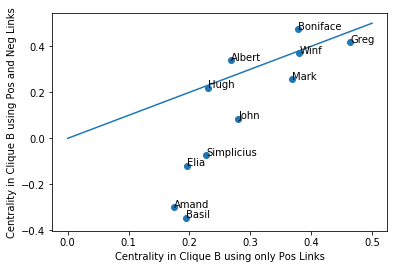

In [55]:
x = np.linspace(0, 0.5)
y = x

ig, ax = plt.subplots()
ax.scatter(eigenvectors_PosCliqueB[:,0], eigenvectors_PosNegCliqueB[:,0])

for i, txt in enumerate(CliqueB_Names):
    ax.annotate(txt, (eigenvectors_PosCliqueB[:,0][i],eigenvectors_PosNegCliqueB[:,0][i]))
ax.plot(x,y, linestyle='solid')

plt.xlabel("Centrality in Clique B using only Pos Links")
plt.ylabel("Centrality in Clique B using Pos and Neg Links")

plt.show()

In [56]:
'''Centrality Scores are all reversed in Table 3 as stated in the article'''

'Centrality Scores are all reversed in Table 3 as stated in the article'

In [57]:
eigenvectors_A[:,0][7:]*=-1

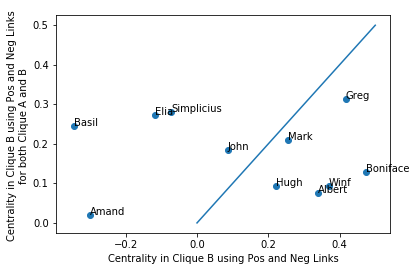

In [58]:
ig, ax = plt.subplots()
ax.scatter(eigenvectors_PosNegCliqueB[:,0], eigenvectors_A[:,0][7:])

for i, txt in enumerate(CliqueB_Names):
    ax.annotate(txt, (eigenvectors_PosNegCliqueB[:,0][i],eigenvectors_A[:,0][7:][i]))
ax.plot(x,y, linestyle='solid')
plt.xlabel("Centrality in Clique B using Pos and Neg Links")
plt.ylabel("Centrality in Clique B using Pos and Neg Links \nfor both Clique A and B ")
plt.show()


### Correlation

In [59]:
corr, _ = pearsonr(eigenvectors_PosNegCliqueB[:,0], eigenvectors_A[:,0][7:])
corr

-0.11411458283619025